In [12]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
#LIBRARIES 
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  PorterStemmer 
import string
import re
import warnings
warnings.simplefilter("ignore")

In [14]:
#lOADING DATASET 
df = pd.read_csv("data and pickle files/updated_data.csv",encoding="latin1") #due to special charas should be encoded as latin 1
#REMOVE MAX
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
df.head()

,Unnamed: 0,review_date,review_rating,review_title,review_text,verified_purchase
0,0,1/1/2019,5,Dove MenÂs + Deodorant,"As you get older, you know what you like and w...",True
1,1,1/2/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,2,1/2/2019,4,Vitamin B12.,Excellent,True
3,3,1/2/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,4,1/2/2019,5,Very handy,Does what is says it does,False


In [16]:
#DROPPING UNWANTED COLUMN
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        2501 non-null   object
 1   review_rating      2501 non-null   int64 
 2   review_title       2396 non-null   object
 3   review_text        2501 non-null   object
 4   verified_purchase  2501 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 80.7+ KB


In [18]:
#CHECK TOTAL DUPLICATE OCCURENCES
dup = df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  783


In [19]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        1718 non-null   object
 1   review_rating      1718 non-null   int64 
 2   review_title       1650 non-null   object
 3   review_text        1718 non-null   object
 4   verified_purchase  1718 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 55.5+ KB


In [20]:
df.isnull().sum()

review_date           0
review_rating         0
review_title         68
review_text           0
verified_purchase     0
dtype: int64

In [21]:
#DROP review_title
df.drop(["review_title","review_date"], axis=1, 
        inplace=True)
df.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


In [22]:
# Check if the columns exist in the DataFrame
columns_to_drop = ['review_title', 'review_date']

for col in columns_to_drop:
    if col not in df.columns:
        print(f"Column '{col}' not found in DataFrame.")

# Drop columns if they exist
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df.head()


Column 'review_title' not found in DataFrame.
Column 'review_date' not found in DataFrame.


,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


In [23]:
#WORD COUNT
df['total words'] = df['review_text'].apply(lambda i: len(str(i).split(" ")))

#CHARACTER COUNT
df['total characters'] = df['review_text'].str.len() #spaces are included

#STOPWORDS COUNT
sw = set(stopwords.words('english'))
df['total stopwords'] = df['review_text'].str.split().apply(lambda i: len(set(i) & sw))

#PUNCTUATION AND SPECIAL CHARA COUNT
count_p = lambda p1,p2: sum([1 for i in p1 if i in p2])
df['total punctuations'] = df.review_text.apply(lambda p: count_p(p, string.punctuation))

#UPPERCASE CHARA COUNT
df['total uppercases'] = df['review_text'].str.findall(r'[A-Z]').str.len() #findall - finds all

In [24]:
df.head() #UPDATED

,review_rating,review_text,verified_purchase,total words,total characters,total stopwords,total punctuations,total uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,10,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,7,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,2,2,1
4,5,Does what is says it does,False,6,25,4,0,1


In [25]:
df.describe()

,review_rating,total words,total characters,total stopwords,total punctuations,total uppercases
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.198487,177.890570,9.257276,4.434226,3.710128
std,1.123083,35.251879,189.818467,8.537092,5.177685,4.209264
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,41.000000,2.000000,1.000000,1.000000
50%,5.000000,21.000000,114.500000,7.000000,3.000000,2.000000
75%,5.000000,50.000000,268.750000,15.000000,7.000000,5.000000
max,5.000000,287.000000,1624.000000,48.000000,42.000000,54.000000


In [26]:
print(df.groupby("verified_purchase").describe())

                  review_rating                                               \
                          count      mean       std  min  25%  50%  75%  max   
verified_purchase                                                              
False                     900.0  4.315556  1.187805  1.0  4.0  5.0  5.0  5.0   
True                      818.0  4.580685  1.030249  1.0  5.0  5.0  5.0  5.0   

                  total words                                               \
                        count       mean        std  min   25%   50%   75%   
verified_purchase                                                            
False                   900.0  50.271111  36.854098  1.0  23.0  48.0  63.0   
True                    818.0  14.414425  21.041211  1.0   3.0   8.0  17.0   

                         total characters                                      \
                     max            count        mean         std  min    25%   
verified_purchase                             

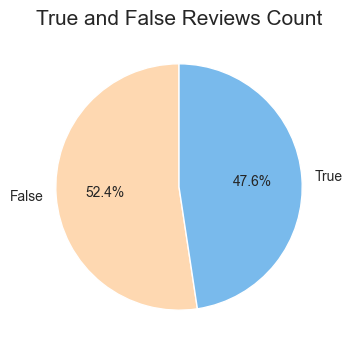

In [27]:
colors = ['#FED8B1','#79BAEC']
plt.figure(figsize=(4,4))
label = df['verified_purchase'].value_counts()
plt.pie(label.values,colors = colors, labels=label.index, autopct= '%1.1f%%', startangle=90)
plt.title('True and False Reviews Count', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Review_Rating Grouped by Verified_Purchase')

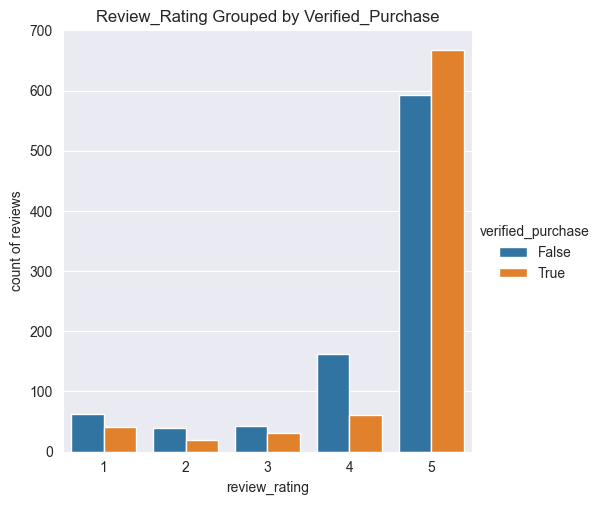

In [28]:
sns.catplot(x ='review_rating',kind="count", hue="verified_purchase", data=df)
plt.xlabel("review_rating")
plt.ylabel("count of reviews")
plt.title("Review_Rating Grouped by Verified_Purchase")

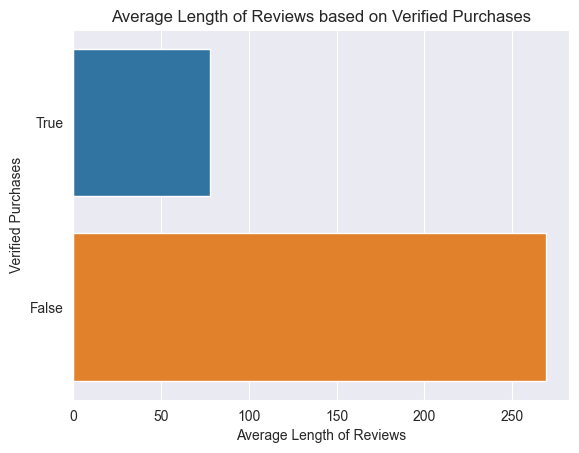

In [29]:
# Assuming 'df' is your DataFrame and 'verified_purchase' is a boolean column

cols = ["verified_purchase", "review_text"]
vprt = df[cols]

# Filtering based on True and False VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]

# Average review length based on True and False VP
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

# Plotting the graph
data = pd.DataFrame({'verified_purchases': ['True', 'False'], 'average_length': [true_average_length, false_average_length]})
sns.barplot(x='average_length', y='verified_purchases', data=data)
plt.xlabel("Average Length of Reviews")
plt.ylabel("Verified Purchases")
plt.title("Average Length of Reviews based on Verified Purchases")
plt.show()


In [30]:
#DROP UNNECESSARY COLUMNS
df.drop(["total words","total characters",
         "total stopwords","total punctuations",
         "total uppercases","review_rating"], axis=1, inplace=True)
df.head()

,review_text,verified_purchase
0,"As you get older, you know what you like and w...",True
1,Three gigantic marmite jars that will last pro...,True
2,Excellent,True
3,A great flavour top - up for slow cooking.,True
4,Does what is says it does,False


In [31]:
import pandas as pd
from textblob import TextBlob

# Assuming you have a DataFrame df with a column named 'review_text'
df['review_text'] = df['review_text'].apply(lambda i: '' if pd.isna(i) else ''.join(c if c is not None else '' for c in TextBlob(str(i)).correct()))

# Display the updated DataFrame
print(df)


                                            review_text  verified_purchase
0     Is you get older, you know what you like and w...               True
1     Three gigantic marie wars that will last proba...               True
2                                             Excellent               True
3            A great flavour top - up for slow cooking.               True
4                             Does what is says it does              False
5                           Excellent item.Good for men              False
6                             Thank you ofm very happy               True
7                                             Beautiful               True
8                               Always buy. Fig bottles               True
9     Always use this product on my heavily mistreat...               True
10                                          Great value               True
11    tos not the one in the picture, but gets 5 st...               True
12    Stem as described, 

In [32]:
df['review_text'].dropna(inplace=True)
df['review_text'] = df['review_text'].apply(lambda i: ''.join(TextBlob(i).correct()))

In [33]:
df_subset = df.head(100)  # Choose an appropriate subset size
df_subset['review_text'] = df_subset['review_text'].apply(lambda i: ''.join(TextBlob(i).correct()))

In [34]:
#REMOVING THE STOPWORDS,PUNCTUATIONS, LOWERCASING, AND STEMMING OF THE SENTENCES
def text_preprocessing(text):
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    tokens = removed_special_characters.lower().split()
    
    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []
    
    for token in tokens:
        if token not in sw:
            cleaned.append(token)
            
    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    return " ".join(stemmed)

In [35]:
df['review_text'] = df['review_text'].apply(text_preprocessing)

In [36]:
df['review_text'].head()

0    get older know like suitabl bodi like love pro...
1    three gigant mari war last probabl whole life ...
2                                                excel
3                          great flavour top slow cook
4                                                  say
Name: review_text, dtype: object

In [37]:
#CHECK RARE WORDS
r = pd.Series(' '.join(df['review_text']).split()).value_counts()[-10:]
print("RARE WORDS:")
print(r)

RARE WORDS:
anitipersperi    1
weird            1
health           1
fork             1
awsm             1
slipperi         1
crafti           1
probe            1
plainli          1
tendon           1
Name: count, dtype: int64


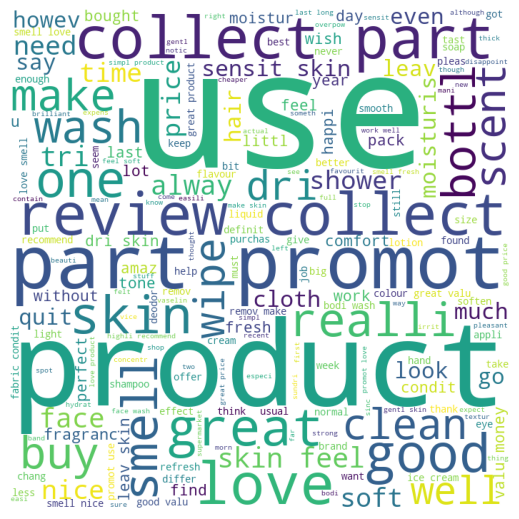

In [38]:
#CHECK TOP COMMON WORDS
words = '' 
for i in df["review_text"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "

    
word_cloud = WordCloud(width = 700, height = 700, 
                       background_color ='white', 
                       min_font_size = 10).generate(words) 
plt.figure(figsize = (5, 5)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [39]:
#removing common and rare words
common = pd.Series(' '.join(df['review_text']).split()).value_counts()[:3]
common = list(common.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in common))

rare = pd.Series(' '.join(df['review_text']).split()).value_counts()[-3:]
rare = list(rare.index)
df['review_text'] = df['review_text'].apply(lambda i: " ".join(i for i in i.split() if i not in rare))

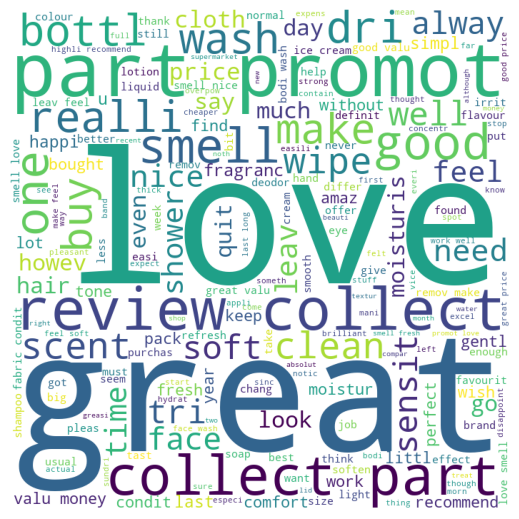

In [40]:
#WORDCLOUD - UPDATED TOP WORDS
words = '' 
for i in df["review_text"]: 
    tokens = i.split()   
    words += " ".join(tokens)+" "

    
word_cloud = WordCloud(width = 700, height = 700, background_color ='white', min_font_size = 10).generate(words) 
plt.figure(figsize = (5, 5)) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [41]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dheeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
df['review_text'].apply(word_tokenize).head()

0    [get, older, know, like, suitabl, bodi, like, ...
1    [three, gigant, mari, war, last, probabl, whol...
2                                              [excel]
3                    [great, flavour, top, slow, cook]
4                                                [say]
Name: review_text, dtype: object

In [43]:
#SAVING UPDATED DATAFRAME AS .csv FILE
df.to_csv('data and pickle files/cleaned_data.csv')